In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
mnist = tf.keras.datasets.mnist     #28x28 imgs of handwritten digits from 0-9
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


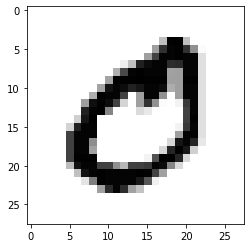

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[21],cmap=plt.cm.binary)
plt.show()

In [14]:
print(x_train[21])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64
  253 255  63   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 205
  251 253 205 111   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 189 251
  251 253 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  16  64 223 244 251 251
  211 213 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  80 181 251 253 25

In [15]:
#normalize the data betwn 0 to 1
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

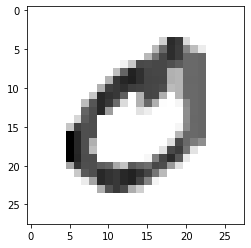

In [16]:
plt.imshow(x_train[21],cmap=plt.cm.binary)
plt.show()

In [17]:
print(x_train[21])   #now the values would be betwn 0-1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)



Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2643 - accuracy: 0.9216
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1096 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0730 - accuracy: 0.9772


In [22]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)


313/313 [==============================] - 0s 778us/step - loss: 0.0824 - accuracy: 0.9751
0.0823865756392479 0.9750999808311462


In [23]:
model.save('HandDigits.model')


INFO:tensorflow:Assets written to: HandDigits.model\assets


In [24]:
new_model=tf.keras.models.load_model('HandDigits.model')

In [25]:
predictions=new_model.predict([x_test])

In [26]:
print(predictions)

[[4.4271014e-09 5.7698071e-07 1.8733752e-05 ... 9.9977356e-01
  4.3146653e-07 7.0389819e-07]
 [1.4726667e-06 5.1996332e-05 9.9993849e-01 ... 9.5298056e-08
  9.8140646e-08 1.3022629e-13]
 [1.0108496e-08 9.9996340e-01 8.4803123e-06 ... 9.4845373e-06
  9.6874437e-06 7.1568124e-08]
 ...
 [6.1044916e-09 4.6316507e-07 3.4927027e-08 ... 8.4819359e-05
  1.5087165e-06 7.5537841e-06]
 [1.6790217e-08 1.8409391e-07 7.0557718e-08 ... 1.2834328e-08
  1.5040410e-03 7.1625657e-08]
 [5.7000858e-07 1.0475916e-08 3.5858683e-08 ... 9.8447739e-10
  1.9575778e-07 1.6412544e-08]]


In [27]:
import numpy as np

In [31]:
print(np.argmax(predictions[1]))

2


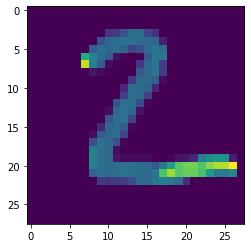

In [33]:
plt.imshow(x_test[1])
plt.show()